### Facial Emotion Recognition

Dataset: [Download on Kaggle](https://www.kaggle.com/datasets/msambare/fer2013)

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sb
from keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

2022-08-20 08:58:47.510270: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-20 08:58:48.401385: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-20 08:58:48.401441: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
TRAIN_DATA = './train/'
TEST_DATA = './test/'

In [3]:
angry = os.listdir(os.path.join(TRAIN_DATA,'angry'))
disgust = os.listdir(os.path.join(TRAIN_DATA,'disgust'))
fear = os.listdir(os.path.join(TRAIN_DATA,'fear'))
sad = os.listdir(os.path.join(TRAIN_DATA,'sad'))
happy = os.listdir(os.path.join(TRAIN_DATA,'happy'))
neutral = os.listdir(os.path.join(TRAIN_DATA,'neutral'))
surprise = os.listdir(os.path.join(TRAIN_DATA,'surprise'))

Text(0.5, 1.0, 'Training Data Image Distribution')

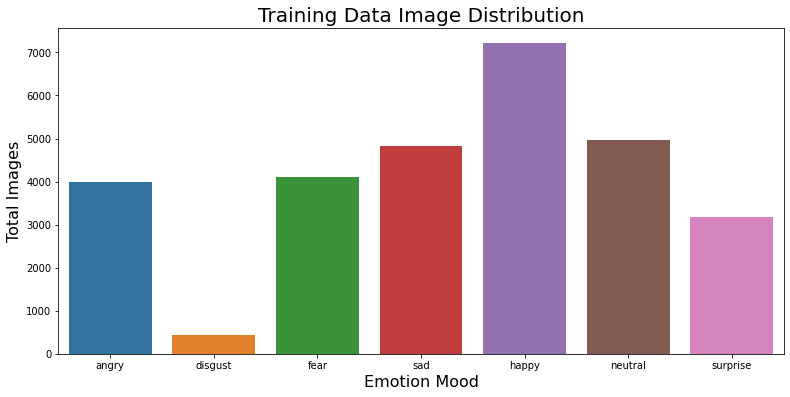

In [4]:
plt.figure(figsize=(13,6))
sb.barplot(
    ['angry','disgust','fear','sad','happy','neutral','surprise'],
    [len(angry),len(disgust),len(fear),len(sad),len(happy),len(neutral),len(surprise)]
)
plt.xlabel("Emotion Mood",fontsize=16)
plt.ylabel("Total Images",fontsize=16)
plt.title("Training Data Image Distribution",fontsize=20)

In [5]:
test_angry = os.listdir(os.path.join(TEST_DATA,'angry'))
test_disgust = os.listdir(os.path.join(TEST_DATA,'disgust'))
test_fear = os.listdir(os.path.join(TEST_DATA,'fear'))
test_sad = os.listdir(os.path.join(TEST_DATA,'sad'))
test_happy = os.listdir(os.path.join(TEST_DATA,'happy'))
test_neutral = os.listdir(os.path.join(TEST_DATA,'neutral'))
test_surprise = os.listdir(os.path.join(TEST_DATA,'surprise'))

Text(0.5, 1.0, 'Testing Data Image Distribution')

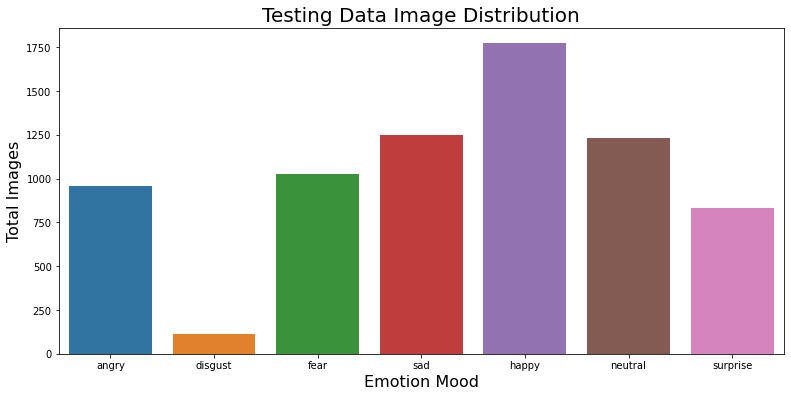

In [6]:
plt.figure(figsize=(13,6))
sb.barplot(
    ['angry','disgust','fear','sad','happy','neutral','surprise'],
    [len(test_angry),len(test_disgust),len(test_fear),len(test_sad),len(test_happy),len(test_neutral),len(test_surprise)]
)
plt.xlabel("Emotion Mood",fontsize=16)
plt.ylabel("Total Images",fontsize=16)
plt.title("Testing Data Image Distribution",fontsize=20)

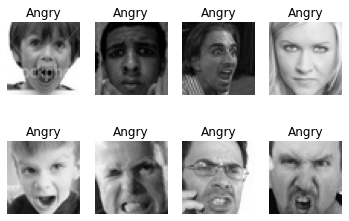

In [7]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'angry',angry[i])))
    plt.axis("off")
    plt.title("Angry")

In [8]:
sample_image = os.path.join(TRAIN_DATA,'angry',angry[10])

In [9]:
from PIL import Image

Image.open(sample_image).size

(48, 48)

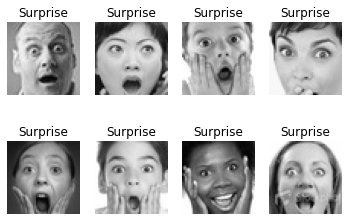

In [10]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'surprise',surprise[i])))
    plt.axis("off")
    plt.title("Surprise")

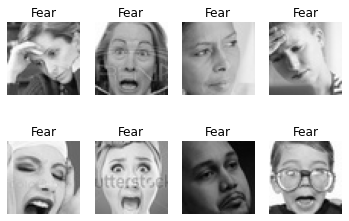

In [11]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'fear',fear[i])))
    plt.axis("off")
    plt.title("Fear")

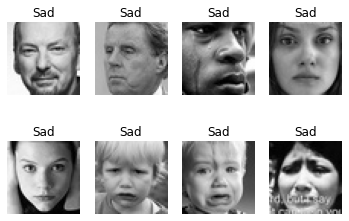

In [12]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'sad',sad[i])))
    plt.axis("off")
    plt.title("Sad")

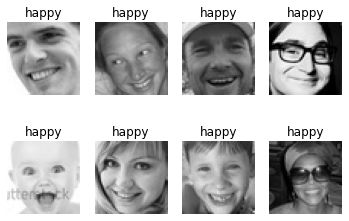

In [13]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'happy',happy[i])))
    plt.axis("off")0.550
    plt.title("happy")

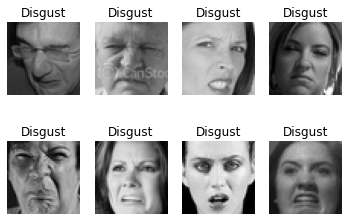

In [14]:
for i in range(8):0.550
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'disgust',disgust[i])))
    plt.axis("off")
    plt.title("Disgust")

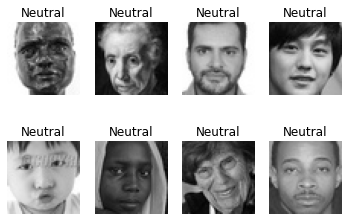

In [19]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'neutral',neutral[i])))
    plt.axis("off")
    plt.title("Neutral")

In [48]:
train_aug = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_aug = ImageDataGenerator(rescale=1./255)

In [67]:
training_data = train_aug.flow_from_directory(TRAIN_DATA,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                class_mode='categorical')


testing_data = test_aug.flow_from_directory(TEST_DATA,
                                                batch_size=64,
                                                target_size=(48,48),
                                                shuffle=True,
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [68]:
for image,label in training_data:
    print(image.shape)
    print(label.shape)
    break

(64, 48, 48, 3)
(64, 7)


In [69]:
training_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [70]:
data_augmentation = tf.keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

In [76]:
model= keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation="relu",padding="same",input_shape=(48, 48, 3)))
model.add(keras.layers.Conv2D(32, (3,3), activation="relu",padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(7,activation="softmax"))

In [77]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 24, 24, 64)      

In [78]:
import datetime
chk_path = 'model.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = keras.callbacks.ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = keras.callbacks.CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [81]:
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=1e-4),
  loss="categorical_crossentropy",
  metrics=['accuracy'])

In [82]:
hist = model.fit_generator(training_data,validation_data=testing_data,epochs=65,callbacks=callbacks)

Epoch 1/65
449/449 [==============================] - ETA: 0s - loss: 1.8188 - accuracy: 0.2432
Epoch 1: val_loss improved from 1.80723 to 1.78375, saving model to model.h5
449/449 [==============================] - 150s 332ms/step - loss: 1.8188 - accuracy: 0.2432 - val_loss: 1.7837 - val_accuracy: 0.2503 - lr: 1.0000e-04
Epoch 2/65
449/449 [==============================] - ETA: 0s - loss: 1.8091 - accuracy: 0.2446
Epoch 2: val_loss did not improve from 1.78375
449/449 [==============================] - 167s 373ms/step - loss: 1.8091 - accuracy: 0.2446 - val_loss: 2.1841 - val_accuracy: 0.2498 - lr: 1.0000e-04
Epoch 3/65
449/449 [==============================] - ETA: 0s - loss: 1.8064 - accuracy: 0.2480
Epoch 3: val_loss improved from 1.78375 to 1.76490, saving model to model.h5
449/449 [==============================] - 157s 351ms/step - loss: 1.8064 - accuracy: 0.2480 - val_loss: 1.7649 - val_accuracy: 0.2671 - lr: 1.0000e-04
Epoch 4/65
449/449 [==============================] - E

449/449 [==============================] - ETA: 0s - loss: 1.2734 - accuracy: 0.5186
Epoch 53: val_loss did not improve from 1.12679
449/449 [==============================] - 149s 332ms/step - loss: 1.2734 - accuracy: 0.5186 - val_loss: 1.1301 - val_accuracy: 0.5596 - lr: 1.0000e-04
Epoch 54/65
449/449 [==============================] - ETA: 0s - loss: 1.2693 - accuracy: 0.5203
Epoch 54: val_loss did not improve from 1.12679
449/449 [==============================] - 146s 325ms/step - loss: 1.2693 - accuracy: 0.5203 - val_loss: 1.2047 - val_accuracy: 0.5386 - lr: 1.0000e-04
Epoch 55/65
449/449 [==============================] - ETA: 0s - loss: 1.2572 - accuracy: 0.5236
Epoch 55: val_loss improved from 1.12679 to 1.10298, saving model to model.h5
449/449 [==============================] - 144s 321ms/step - loss: 1.2572 - accuracy: 0.5236 - val_loss: 1.1030 - val_accuracy: 0.5729 - lr: 1.0000e-04
Epoch 56/65
449/449 [==============================] - ETA: 0s - loss: 1.2586 - accuracy: 0

In [83]:
model.save("FacialEmotionRecognition.h5")
model.save_weights("FacialEmotion_weights.h5")

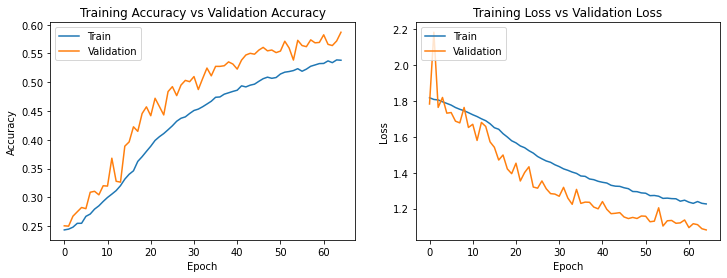

In [85]:
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [86]:
#setting learning rate

learning_rate = 3e-5 
lr_start = 0.00000001
lr_min = 0.000001
lr_max = 3e-5 
lr_rampup_epochs = 1
lr_sustain_epochs = 1
lr_exp_decay = .8

def lrfn(epoch):
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) * lr_exp_decay**(epoch - lr_rampup_epochs - lr_sustain_epochs) + lr_min
    return lr

In [88]:
earlystop = keras.callbacks.EarlyStopping(patience= 5)

lr_callback = keras.callbacks.LearningRateScheduler(lrfn, verbose = True)

rescallbacks = [earlystop, lr_callback]

In [90]:
resmodel = keras.applications.ResNet50(include_top=False,weights='imagenet',classes=7,input_shape=(48,48,3))

In [93]:
ResModel = keras.models.Sequential()
ResModel.add(resmodel)
ResModel.add(keras.layers.Flatten())
ResModel.add(keras.layers.Dense(512,activation="relu"))
ResModel.add(keras.layers.Dropout(0.5))
ResModel.add(keras.layers.Dense(7,activation="softmax"))

In [97]:
ResModel.trainable = False

In [99]:
ResModel.compile(loss='binary_crossentropy',
                 optimizer="rmsprop",
                 metrics=['acc'])

In [100]:
Reshistory = ResModel.fit_generator(
    training_data,
    steps_per_epoch=100,
    epochs=40,
    validation_data=testing_data,
    validation_steps=45,
    callbacks=rescallbacks)


Epoch 1: LearningRateScheduler setting learning rate to 1e-08.
Epoch 1/40
100/100 [==============================] - ETA: 0s - loss: 1.0458 - acc: 0.1130

KeyboardInterrupt: 

In [ ]:
y_pred = fernet.predict(training_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(training_set.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(training_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [ ]:
y_pred = fernet.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

#from sklearn.metrics import classification_report, confusion_matrix
cm_test = confusion_matrix(test_set.classes, y_pred)
print('Confusion Matrix')
print(cm_test)
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
plt.imshow(cm_test, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)

In [101]:
fmr = keras.models.load_model('FacialEmotionRecognition.h5')

In [102]:
fmr.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_66 (Conv2D)          (None, 24, 24, 64)      

In [103]:
fmr.evaluate_generator(testing_data)

[1.0812437534332275, 0.5869323015213013]

In [104]:
fmr.evaluate(testing_data)

113/113 [==============================] - 11s 98ms/step - loss: 1.0812 - accuracy: 0.5869


[1.0812437534332275, 0.5869323015213013]